In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json
from pprint import pprint
import bson
from bson import BSON
from bson.codec_options import CodecOptions

In [3]:
df = pd.read_csv('first_54_h.csv')

In [4]:
df.head()

,Unnamed: 0,lvl1_культура,lvl1_экономика_и_финансы,lvl1_спорт,lvl1_наука_и_техника,lvl1_медиа,lvl1_бизнес,lvl1_происшествия,lvl1_силовые_структуры,lvl1_общество_и_путешествия,lvl1_политика
0,0,0.090534,0.114373,0.044902,0.059335,0.049553,0.018778,0.002814,0.017841,0.392947,0.208923
1,1,0.087964,0.122302,0.060795,0.055922,0.035944,0.013070,0.002972,0.018397,0.415436,0.187198
2,2,0.114770,0.121134,0.043658,0.052203,0.027930,0.019900,0.000000,0.010524,0.408985,0.200895
3,3,0.093118,0.153189,0.040976,0.046574,0.041070,0.021223,0.001364,0.010375,0.367628,0.224483
4,4,0.084817,0.201282,0.055320,0.039851,0.038740,0.012890,0.001718,0.011958,0.366460,0.186965


In [5]:
alldata = pd.read_csv('august_1h.csv')
alldata.head(7)

,ID,lvl1_наука_и_техника,lvl1_политика,lvl1_силовые_структуры,lvl1_экономика_и_финансы,lvl1_медиа,lvl1_спорт,lvl1_происшествия,lvl1_бизнес,lvl1_общество_и_путешествия,lvl1_культура
0,0,0.080240,0.223298,0.000000,0.148605,0.035701,0.000000,0.000000,0.000000,0.365745,0.146411
1,1,0.050020,0.276003,0.000000,0.081872,0.031333,0.107605,0.052282,0.000000,0.373657,0.027227
2,2,0.186900,0.154168,0.000000,0.017970,0.044505,0.003853,0.000000,0.000000,0.512437,0.080167
3,3,0.000000,0.215257,0.000000,0.320505,0.055982,0.055238,0.000000,0.018539,0.294917,0.039561
4,4,0.110776,0.197254,0.000000,0.181522,0.037135,0.001978,0.000000,0.000000,0.432730,0.038606
5,5,0.000000,0.154003,0.007201,0.129917,0.037267,0.000000,0.000000,0.000000,0.442512,0.229100
6,6,0.021727,0.202168,0.005268,0.120145,0.021577,0.021600,0.000000,0.000000,0.473432,0.134082


In [6]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(series[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

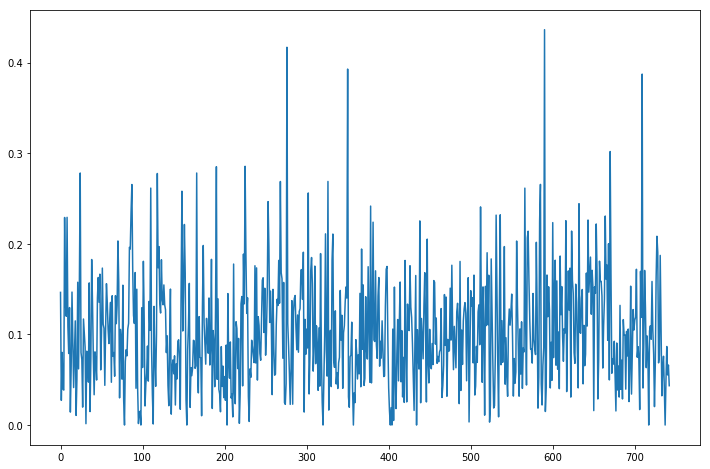

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(alldata['lvl1_культура'])), alldata['lvl1_культура'])
plt.show()

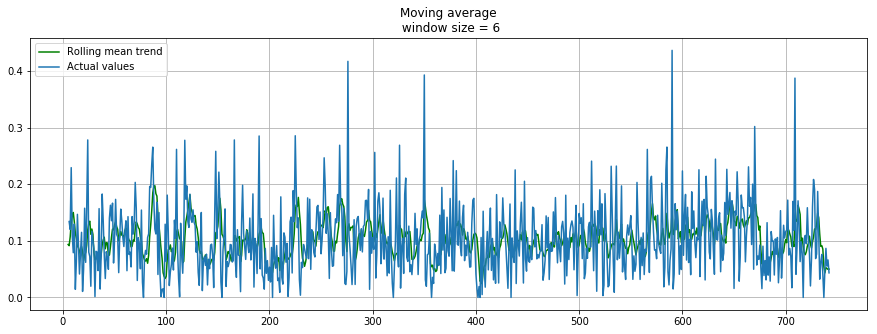

In [8]:
plotMovingAverage(alldata['lvl1_культура'], 6)

In [9]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm_notebook

/home/celidos/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
y = np.array(alldata['lvl1_экономика_и_финансы'])

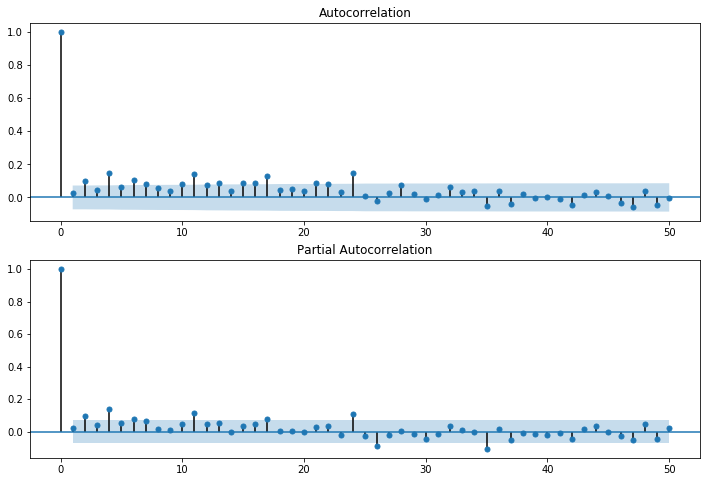

In [11]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=50, ax=ax2)
plt.show()

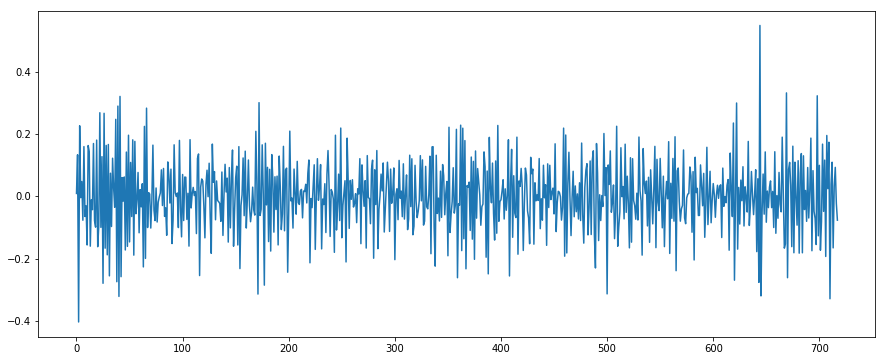

In [12]:
yt = y[1:] - y[:-1]  # дифференцирование
yt = yt[24:] - yt[:-24]


plt.figure(figsize=(15, 6))
plt.plot(yt)
plt.show()

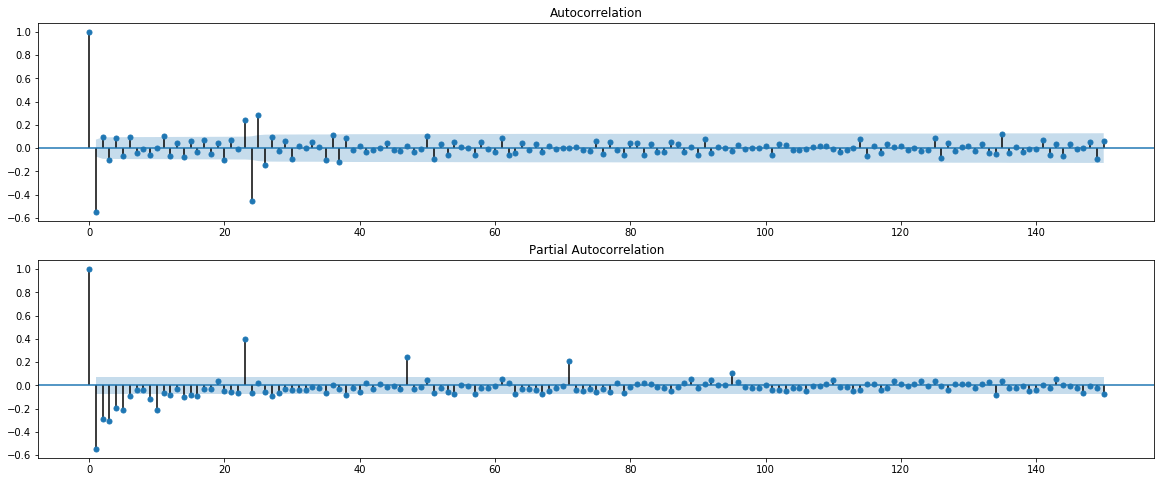

In [13]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(yt, lags=150, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(yt, lags=150, ax=ax2)
plt.show()

In [14]:
p = range(3)
q = range(5)
d = [1]
P = range(4)
D = [1]
Q = range(3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(P, D, Q))]

In [15]:
warnings.filterwarnings('ignore')

for param in tqdm_notebook(pdq):
    for param_seasonal in tqdm_notebook(seasonal_pdq, leave=False):
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, 
                                              enforce_stationarity=False, enforce_invertibility=False)
            model = model.fit()
            print('ARIMA{}x{}24 – AIC:{}'.format(param, param_seasonal, model.aic))
        except:
            continue

A Jupyter Widget

A Jupyter Widget

ARIMA(0, 1, 0)x(0, 1, 1, 24)24 – AIC:-1360.3993480764152
ARIMA(0, 1, 0)x(0, 1, 2, 24)24 – AIC:-1352.3173558802582
ARIMA(0, 1, 0)x(1, 1, 0, 24)24 – AIC:-1181.233119519357
ARIMA(0, 1, 0)x(1, 1, 1, 24)24 – AIC:-1343.8230996340026
ARIMA(0, 1, 0)x(1, 1, 2, 24)24 – AIC:-1357.0063670630857
ARIMA(0, 1, 0)x(2, 1, 0, 24)24 – AIC:-1266.7947987841571
ARIMA(0, 1, 0)x(2, 1, 1, 24)24 – AIC:-1319.6165252032308
ARIMA(0, 1, 0)x(2, 1, 2, 24)24 – AIC:-1344.274700161622
ARIMA(0, 1, 0)x(3, 1, 0, 24)24 – AIC:-1256.9854712645756
ARIMA(0, 1, 0)x(3, 1, 1, 24)24 – AIC:-1290.8328823983964
ARIMA(0, 1, 0)x(3, 1, 2, 24)24 – AIC:-1295.1197697520165


A Jupyter Widget

ARIMA(0, 1, 1)x(0, 1, 0, 24)24 – AIC:-1510.215439820201
ARIMA(0, 1, 1)x(0, 1, 1, 24)24 – AIC:-1838.231195080787
ARIMA(0, 1, 1)x(0, 1, 2, 24)24 – AIC:-1796.2913001669185
ARIMA(0, 1, 1)x(1, 1, 0, 24)24 – AIC:-1635.2199350755873
ARIMA(0, 1, 1)x(1, 1, 1, 24)24 – AIC:-1828.3175752646575
ARIMA(0, 1, 1)x(1, 1, 2, 24)24 – AIC:-1802.3635865842318
ARIMA(0, 1, 1)x(2, 1, 0, 24)24 – AIC:-1690.8426635333499
ARIMA(0, 1, 1)x(2, 1, 1, 24)24 – AIC:-1772.6519455556102
ARIMA(0, 1, 1)x(2, 1, 2, 24)24 – AIC:-1788.0432104965626
ARIMA(0, 1, 1)x(3, 1, 0, 24)24 – AIC:-1673.4880750414127
ARIMA(0, 1, 1)x(3, 1, 1, 24)24 – AIC:-1718.4542500878415
ARIMA(0, 1, 1)x(3, 1, 2, 24)24 – AIC:-1723.5796666172025


A Jupyter Widget

ARIMA(0, 1, 2)x(0, 1, 0, 24)24 – AIC:-1517.6561977736333
ARIMA(0, 1, 2)x(0, 1, 1, 24)24 – AIC:-1836.246750907132
ARIMA(0, 1, 2)x(0, 1, 2, 24)24 – AIC:-1792.310371907123
ARIMA(0, 1, 2)x(1, 1, 0, 24)24 – AIC:-1634.72875620275
ARIMA(0, 1, 2)x(1, 1, 1, 24)24 – AIC:-1829.9284254197469
ARIMA(0, 1, 2)x(1, 1, 2, 24)24 – AIC:-1798.8557068654923
ARIMA(0, 1, 2)x(2, 1, 0, 24)24 – AIC:-1689.4125648831457
ARIMA(0, 1, 2)x(2, 1, 1, 24)24 – AIC:-1774.5391360759263
ARIMA(0, 1, 2)x(2, 1, 2, 24)24 – AIC:-1785.6430697527358
ARIMA(0, 1, 2)x(3, 1, 0, 24)24 – AIC:-1672.7361776268308
ARIMA(0, 1, 2)x(3, 1, 1, 24)24 – AIC:-1718.9542249163674
ARIMA(0, 1, 2)x(3, 1, 2, 24)24 – AIC:-1723.671891836419


A Jupyter Widget

ARIMA(0, 1, 3)x(0, 1, 0, 24)24 – AIC:-1516.352162131148
ARIMA(0, 1, 3)x(0, 1, 1, 24)24 – AIC:-1833.085425784718
ARIMA(0, 1, 3)x(0, 1, 2, 24)24 – AIC:-1785.5581838697994
ARIMA(0, 1, 3)x(1, 1, 0, 24)24 – AIC:-1632.7779247514286
ARIMA(0, 1, 3)x(1, 1, 1, 24)24 – AIC:-1825.648329977736
ARIMA(0, 1, 3)x(1, 1, 2, 24)24 – AIC:-1793.0188500418085
ARIMA(0, 1, 3)x(2, 1, 0, 24)24 – AIC:-1688.4880963423502
ARIMA(0, 1, 3)x(2, 1, 1, 24)24 – AIC:-1772.5490198652078
ARIMA(0, 1, 3)x(2, 1, 2, 24)24 – AIC:-1780.6433629609871
ARIMA(0, 1, 3)x(3, 1, 0, 24)24 – AIC:-1671.5486377751283
ARIMA(0, 1, 3)x(3, 1, 1, 24)24 – AIC:-1717.3574207822342
ARIMA(0, 1, 3)x(3, 1, 2, 24)24 – AIC:-1722.38274182044


A Jupyter Widget

ARIMA(0, 1, 4)x(0, 1, 0, 24)24 – AIC:-1510.5126754807554
ARIMA(0, 1, 4)x(0, 1, 1, 24)24 – AIC:-1834.4494069154832
ARIMA(0, 1, 4)x(0, 1, 2, 24)24 – AIC:-1780.1992693992297
ARIMA(0, 1, 4)x(1, 1, 0, 24)24 – AIC:-1632.466210393824
ARIMA(0, 1, 4)x(1, 1, 1, 24)24 – AIC:-1823.3331777574426
ARIMA(0, 1, 4)x(1, 1, 2, 24)24 – AIC:-1788.924045731931
ARIMA(0, 1, 4)x(2, 1, 0, 24)24 – AIC:-1688.124875953089
ARIMA(0, 1, 4)x(2, 1, 1, 24)24 – AIC:-1771.4791186255943
ARIMA(0, 1, 4)x(2, 1, 2, 24)24 – AIC:-1776.5780034715458
ARIMA(0, 1, 4)x(3, 1, 0, 24)24 – AIC:-1670.3430749218824
ARIMA(0, 1, 4)x(3, 1, 1, 24)24 – AIC:-1715.769421129913
ARIMA(0, 1, 4)x(3, 1, 2, 24)24 – AIC:-1720.9419375131743


A Jupyter Widget

ARIMA(1, 1, 0)x(0, 1, 0, 24)24 – AIC:-1269.967504457843
ARIMA(1, 1, 0)x(0, 1, 1, 24)24 – AIC:-1606.282883921795
ARIMA(1, 1, 0)x(0, 1, 2, 24)24 – AIC:-1560.891877665233
ARIMA(1, 1, 0)x(1, 1, 0, 24)24 – AIC:-1406.0479359529922
ARIMA(1, 1, 0)x(1, 1, 1, 24)24 – AIC:-1608.319392610243
ARIMA(1, 1, 0)x(1, 1, 2, 24)24 – AIC:-1567.328150169955
ARIMA(1, 1, 0)x(2, 1, 0, 24)24 – AIC:-1452.1206304860448
ARIMA(1, 1, 0)x(2, 1, 1, 24)24 – AIC:-1542.371398175956
ARIMA(1, 1, 0)x(2, 1, 2, 24)24 – AIC:-1555.2695749752233
ARIMA(1, 1, 0)x(3, 1, 0, 24)24 – AIC:-1444.435523107149
ARIMA(1, 1, 0)x(3, 1, 1, 24)24 – AIC:-1489.2986192389144
ARIMA(1, 1, 0)x(3, 1, 2, 24)24 – AIC:-1493.6542901888852


A Jupyter Widget

ARIMA(1, 1, 1)x(0, 1, 0, 24)24 – AIC:-1510.1481902680339
ARIMA(1, 1, 1)x(0, 1, 1, 24)24 – AIC:-1840.684266795792
ARIMA(1, 1, 1)x(0, 1, 2, 24)24 – AIC:-1796.826045839054
ARIMA(1, 1, 1)x(1, 1, 0, 24)24 – AIC:-1633.6932863805634
ARIMA(1, 1, 1)x(1, 1, 1, 24)24 – AIC:-1831.91534698044
ARIMA(1, 1, 1)x(1, 1, 2, 24)24 – AIC:-1802.9745758184076
ARIMA(1, 1, 1)x(2, 1, 0, 24)24 – AIC:-1687.1584695293177
ARIMA(1, 1, 1)x(2, 1, 1, 24)24 – AIC:-1773.682700184634
ARIMA(1, 1, 1)x(2, 1, 2, 24)24 – AIC:-1788.6399646251834
ARIMA(1, 1, 1)x(3, 1, 0, 24)24 – AIC:-1529.428485649526
ARIMA(1, 1, 1)x(3, 1, 1, 24)24 – AIC:-1718.6039833369932
ARIMA(1, 1, 1)x(3, 1, 2, 24)24 – AIC:-1722.6076329763869


A Jupyter Widget

ARIMA(1, 1, 2)x(0, 1, 0, 24)24 – AIC:-1520.1000731438066
ARIMA(1, 1, 2)x(0, 1, 1, 24)24 – AIC:-1837.6479758160963
ARIMA(1, 1, 2)x(0, 1, 2, 24)24 – AIC:-1791.9181312595756
ARIMA(1, 1, 2)x(1, 1, 0, 24)24 – AIC:-1634.0252923740431
ARIMA(1, 1, 2)x(1, 1, 1, 24)24 – AIC:-1836.7161505673557
ARIMA(1, 1, 2)x(1, 1, 2, 24)24 – AIC:-1793.2964635808526
ARIMA(1, 1, 2)x(2, 1, 0, 24)24 – AIC:-1685.3700667017329
ARIMA(1, 1, 2)x(2, 1, 1, 24)24 – AIC:-1772.354172380532
ARIMA(1, 1, 2)x(2, 1, 2, 24)24 – AIC:-1783.140815212179
ARIMA(1, 1, 2)x(3, 1, 0, 24)24 – AIC:-1669.0463290514024
ARIMA(1, 1, 2)x(3, 1, 1, 24)24 – AIC:-1715.9677477771825
ARIMA(1, 1, 2)x(3, 1, 2, 24)24 – AIC:-1719.925262341859


A Jupyter Widget

ARIMA(1, 1, 3)x(0, 1, 0, 24)24 – AIC:-1515.9042807218832
ARIMA(1, 1, 3)x(0, 1, 1, 24)24 – AIC:-1834.2434106200458
ARIMA(1, 1, 3)x(0, 1, 2, 24)24 – AIC:-1785.396033506099
ARIMA(1, 1, 3)x(1, 1, 0, 24)24 – AIC:-1632.040368412178
ARIMA(1, 1, 3)x(1, 1, 1, 24)24 – AIC:-1825.5359201402844
ARIMA(1, 1, 3)x(1, 1, 2, 24)24 – AIC:-1790.2064838381023
ARIMA(1, 1, 3)x(2, 1, 0, 24)24 – AIC:-1683.2263078431401
ARIMA(1, 1, 3)x(2, 1, 1, 24)24 – AIC:-1770.171562526646
ARIMA(1, 1, 3)x(2, 1, 2, 24)24 – AIC:-1778.4492078607072
ARIMA(1, 1, 3)x(3, 1, 0, 24)24 – AIC:-1667.5049660689745
ARIMA(1, 1, 3)x(3, 1, 1, 24)24 – AIC:-1714.7380798087568
ARIMA(1, 1, 3)x(3, 1, 2, 24)24 – AIC:-1718.7731370714905


A Jupyter Widget

ARIMA(1, 1, 4)x(0, 1, 0, 24)24 – AIC:-1511.6322141161058
ARIMA(1, 1, 4)x(0, 1, 1, 24)24 – AIC:-1833.0752559162595
ARIMA(1, 1, 4)x(0, 1, 2, 24)24 – AIC:-1777.9968829738737
ARIMA(1, 1, 4)x(1, 1, 0, 24)24 – AIC:-1630.5187734048163
ARIMA(1, 1, 4)x(1, 1, 1, 24)24 – AIC:-1822.634014145104
ARIMA(1, 1, 4)x(1, 1, 2, 24)24 – AIC:-1786.1081299710245
ARIMA(1, 1, 4)x(2, 1, 0, 24)24 – AIC:-1683.9507319145648
ARIMA(1, 1, 4)x(2, 1, 1, 24)24 – AIC:-1769.1388103076886
ARIMA(1, 1, 4)x(2, 1, 2, 24)24 – AIC:-1774.6596347193758
ARIMA(1, 1, 4)x(3, 1, 0, 24)24 – AIC:-1667.7772957176062
ARIMA(1, 1, 4)x(3, 1, 1, 24)24 – AIC:-1713.8650127555843
ARIMA(1, 1, 4)x(3, 1, 2, 24)24 – AIC:-1717.6307304190327


A Jupyter Widget

ARIMA(2, 1, 0)x(0, 1, 0, 24)24 – AIC:-1330.1588167319576
ARIMA(2, 1, 0)x(0, 1, 1, 24)24 – AIC:-1670.6505220701115
ARIMA(2, 1, 0)x(0, 1, 2, 24)24 – AIC:-1522.154584410056
ARIMA(2, 1, 0)x(1, 1, 0, 24)24 – AIC:-1470.6940791423044
ARIMA(2, 1, 0)x(1, 1, 1, 24)24 – AIC:-1665.4312370559783
ARIMA(2, 1, 0)x(1, 1, 2, 24)24 – AIC:-1641.792831798582
ARIMA(2, 1, 0)x(2, 1, 0, 24)24 – AIC:-1522.2473623442283
ARIMA(2, 1, 0)x(2, 1, 1, 24)24 – AIC:-1612.2305227604143
ARIMA(2, 1, 0)x(2, 1, 2, 24)24 – AIC:-1626.2825623137212
ARIMA(2, 1, 0)x(3, 1, 0, 24)24 – AIC:-1516.0398668705898
ARIMA(2, 1, 0)x(3, 1, 1, 24)24 – AIC:-1563.2519897235518
ARIMA(2, 1, 0)x(3, 1, 2, 24)24 – AIC:-1566.0002793974238


A Jupyter Widget

ARIMA(2, 1, 1)x(0, 1, 0, 24)24 – AIC:-1512.4898314328484
ARIMA(2, 1, 1)x(0, 1, 1, 24)24 – AIC:-1837.8212747924008
ARIMA(2, 1, 1)x(0, 1, 2, 24)24 – AIC:-1795.2467049689376
ARIMA(2, 1, 1)x(1, 1, 0, 24)24 – AIC:-1631.635652183783
ARIMA(2, 1, 1)x(1, 1, 1, 24)24 – AIC:-1830.1929529331733
ARIMA(2, 1, 1)x(1, 1, 2, 24)24 – AIC:-1800.2080610894213
ARIMA(2, 1, 1)x(2, 1, 0, 24)24 – AIC:-1683.0241227223178
ARIMA(2, 1, 1)x(2, 1, 1, 24)24 – AIC:-1770.18059303061
ARIMA(2, 1, 1)x(2, 1, 2, 24)24 – AIC:-1786.8515807155209
ARIMA(2, 1, 1)x(3, 1, 0, 24)24 – AIC:-1667.2825543627955
ARIMA(2, 1, 1)x(3, 1, 1, 24)24 – AIC:-1714.2655569627673
ARIMA(2, 1, 1)x(3, 1, 2, 24)24 – AIC:-1718.4682224033095


A Jupyter Widget

ARIMA(2, 1, 2)x(0, 1, 0, 24)24 – AIC:-1518.6679970485056
ARIMA(2, 1, 2)x(0, 1, 1, 24)24 – AIC:-1835.7623310202257
ARIMA(2, 1, 2)x(0, 1, 2, 24)24 – AIC:-1790.1904612009773
ARIMA(2, 1, 2)x(1, 1, 0, 24)24 – AIC:-1630.9041519416307
ARIMA(2, 1, 2)x(1, 1, 1, 24)24 – AIC:-1828.0898015751645
ARIMA(2, 1, 2)x(1, 1, 2, 24)24 – AIC:-1792.4816318899907
ARIMA(2, 1, 2)x(2, 1, 0, 24)24 – AIC:-1680.0786054266966
ARIMA(2, 1, 2)x(2, 1, 1, 24)24 – AIC:-1768.5948073795767
ARIMA(2, 1, 2)x(2, 1, 2, 24)24 – AIC:-1781.6050394722656
ARIMA(2, 1, 2)x(3, 1, 0, 24)24 – AIC:-1664.522596637095
ARIMA(2, 1, 2)x(3, 1, 1, 24)24 – AIC:-1711.8353136831452
ARIMA(2, 1, 2)x(3, 1, 2, 24)24 – AIC:-1715.1290657224145


A Jupyter Widget

ARIMA(2, 1, 3)x(0, 1, 0, 24)24 – AIC:-1515.656705958348
ARIMA(2, 1, 3)x(0, 1, 1, 24)24 – AIC:-1832.1844763636632
ARIMA(2, 1, 3)x(0, 1, 2, 24)24 – AIC:-1781.533833283826
ARIMA(2, 1, 3)x(1, 1, 0, 24)24 – AIC:-1628.9141105223152
ARIMA(2, 1, 3)x(1, 1, 1, 24)24 – AIC:-1823.4963874576838
ARIMA(2, 1, 3)x(1, 1, 2, 24)24 – AIC:-1788.2655288162862
ARIMA(2, 1, 3)x(2, 1, 0, 24)24 – AIC:-1679.427155278931
ARIMA(2, 1, 3)x(2, 1, 1, 24)24 – AIC:-1767.527991614858
ARIMA(2, 1, 3)x(2, 1, 2, 24)24 – AIC:-1775.9618378275832
ARIMA(2, 1, 3)x(3, 1, 0, 24)24 – AIC:-1662.6730126638906
ARIMA(2, 1, 3)x(3, 1, 1, 24)24 – AIC:-1710.0897971330203
ARIMA(2, 1, 3)x(3, 1, 2, 24)24 – AIC:-1713.9579978076317


A Jupyter Widget

ARIMA(2, 1, 4)x(0, 1, 0, 24)24 – AIC:-1510.3436548278896
ARIMA(2, 1, 4)x(0, 1, 1, 24)24 – AIC:-1831.584525752767
ARIMA(2, 1, 4)x(0, 1, 2, 24)24 – AIC:-1777.8112784032953
ARIMA(2, 1, 4)x(1, 1, 0, 24)24 – AIC:-1628.3394499278493
ARIMA(2, 1, 4)x(1, 1, 1, 24)24 – AIC:-1820.859537251008
ARIMA(2, 1, 4)x(1, 1, 2, 24)24 – AIC:-1785.2136829125411
ARIMA(2, 1, 4)x(2, 1, 0, 24)24 – AIC:-1678.571160419162
ARIMA(2, 1, 4)x(2, 1, 1, 24)24 – AIC:-1766.118453599931
ARIMA(2, 1, 4)x(2, 1, 2, 24)24 – AIC:-1773.038215633213
ARIMA(2, 1, 4)x(3, 1, 0, 24)24 – AIC:-1663.237341272314
ARIMA(2, 1, 4)x(3, 1, 1, 24)24 – AIC:-1709.2261049062213
ARIMA(2, 1, 4)x(3, 1, 2, 24)24 – AIC:-1713.579947970813



In [17]:
#ARIMA(1, 1, 1)x(0, 1, 1, 24)24 – AIC:-1840.684266795792
    
p, d, q, P, D, Q = 1, 1, 1, 0, 1, 1

In [18]:
model = sm.tsa.statespace.SARIMAX(y, order=(p, d, q), seasonal_order=(P, D, Q, 24),
                                enforce_stationarity=False, enforce_invertibility=False)
model = model.fit()
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0864      0.037     -2.350      0.019      -0.158      -0.014
ma.L1         -0.9186      0.017    -55.117      0.000      -0.951      -0.886
ma.S.L24      -0.9243      0.025    -36.670      0.000      -0.974      -0.875
sigma2         0.0039      0.000     22.589      0.000       0.004       0.004


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  743
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 24)   Log Likelihood                 924.342
Date:                            Sun, 04 Mar 2018   AIC                          -1840.684
Time:                                    11:11:28   BIC                          -1822.241
Sample:                                         0   HQIC                         -1833.575
                                            - 743                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0864      0.037     -2.350      0.019      -0.158      -0.014
ma.L1         -0.9186      0.017    -55.117      0.000      -0.951      -0.886
ma.S.L24      -0.9243      0.025    -36.670      0.000      -0.974      -0.875
sigma2         0.0039      0.000     22.589      0.000       0.004       0.004
===================================================================================
Ljung-Box (Q):                       40.41   Jarque-Bera (JB):                70.15
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.63
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# pred = model.get_prediction(dynamic=False)
pred = model.get_forecast(steps=100, dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower y,upper y
0,0.019651,0.263631
1,0.030307,0.274291
2,0.010535,0.255315
3,0.030494,0.275943
4,0.016445,0.262575
5,0.031846,0.278653
6,0.030484,0.277966
7,0.037040,0.285196
8,0.014015,0.262842
9,0.041296,0.290794


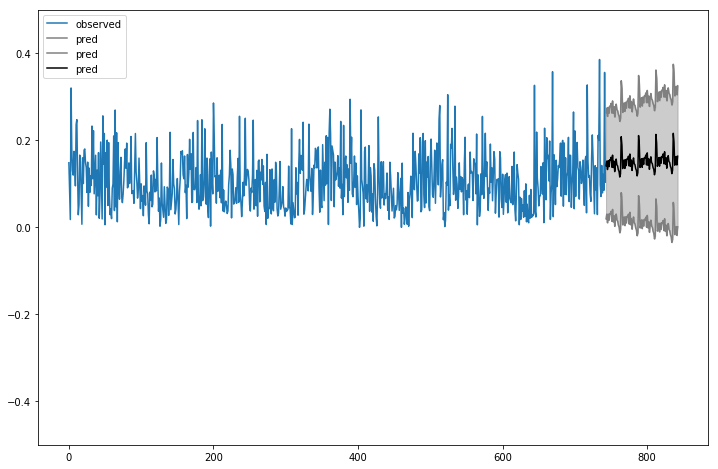

In [52]:
plt.figure(figsize=(12, 8))
ax = plt.plot(y, label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
plt.fill_between(len(y)+pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.plot(np.arange(len(y), len(y)+100), pred_ci, label='pred', color='gray')
plt.plot(np.arange(len(y), len(y)+100), pred.predicted_mean, label='pred', color='black')
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
# plt.plot(y, label='real value', alpha=0.5)
plt.legend()
plt.show()

In [22]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

In [80]:
data = pd.DataFrame([[1, 2, 3, 4], [4, 5, 4, 4], [1, 2, 3, 4], [0, -1, -3, 0]])
datacorr = pd.DataFrame(data.corr())
datacorr

,0,1,2,3
0,1.000000,0.942809,0.691280,0.577350
1,0.942809,1.000000,0.892607,0.816497
2,0.691280,0.892607,1.000000,0.989100
3,0.577350,0.816497,0.989100,1.000000


In [81]:
datacorr[(datacorr < 0.8).any(axis=1)]

,0,1,2,3
0,1.00000,0.942809,0.69128,0.57735
2,0.69128,0.892607,1.00000,0.98910
3,0.57735,0.816497,0.98910,1.00000


In [111]:
def get_collinear_columns(df, threshold):
    goodlist = list(df[df > threshold].stack().index)
    ans = set()
    setleft = set()
    goodlist = set(goodlist)
    while len(goodlist) > 0:
        t = goodlist.pop()
        
        goodlist = set([x for x in set(goodlist) if x[1] != t[1]])
        goodlist = set([x for x in set(goodlist) if x[0] != t[1]])
        
        ans.add(t[1])
    return ans

In [112]:
testdata = pd.DataFrame([[0, 0.81, 0.7], [0.76, 0, 0.9], [0, 0, 0]])

In [113]:
get_collinear_columns(testdata, 0.8)

{1}